In [193]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import numpy as np


In [194]:
from IPython.display import HTML
style = "<style>svg{width:30% !important;height:30% !important;}</style>"
HTML(style)

In [195]:
titanic_data = pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Описание датафрейма:

- PassengerId - id пассажира
- Survived - выжил пассажир или нет
- Pclass - класс биллета, который он приобрёл
- Name - имя
- Sex - пол
- Age - возраст
- SibSp - число сопутствующих с ним пассажиров
- Parch - число родителей/детей на борту Титаника
- Ticket - номер билета
- Fare - стоимость билета
- Cabin - каюта, в которой он ехал
- Embarked - Порт погрузки(C = Шербур, Q = Куинстаун, S = Саутгемптон

### ЗАДАЧА: обучить дерево решений, которое будет предсказывать выжил пассажир или не выжил, основываясь на данных пассажиров из датасета train.csv.

1) в первую очередь узнаем, сколько в датасэте имеется пустых значений (переменные, в которых 99% пропущенных значений, то скорее всего от них можно отказаться.)

In [196]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

2) Соберем переменные, на основании которой мы будем обучать модель строить решающие деревья

In [197]:
# удалим именно те переменные, которые лишние для анализа
# обязательно удаляем переменную Survived, потому что именно ее мы собираемся предсказывать

X = titanic_data.drop(['PassengerId', 'Survived', 'Name','Ticket', 'Cabin' ], axis=1) 
y= titanic_data.Survived

3) обучаем дерево на данных титаника

и здесь важный момент: решающее дерево не умеет работать ни с чем, кроме чисел, поэтому мы должны любые строки или иные данные закодировать в формате чисел

Как решать:
- либо применять простой метод pandas get_dummies, который получит датасэт, а на выходе заменит ВСЕ его строковые значения на числовые

In [198]:
X= pd.get_dummies(X)
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


4) но и это не все - пустые значения NaN тоже нужно заменить:
- для этого используем наиболее удобный способо fillna(), который заменит пустое значение на то, что мы ему передадим - в данном случае используем медианное значение возраста

In [199]:
X.Age.median()

28.0

In [200]:
X.isnull().sum()    # посмотрим где и сколько у нас осталось пустых значений - только в графе возраст

Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [201]:
# заполним пустые значения возраста значением медианы
#X = X.fillna(np.median(X.Age.replace(np.nan, 0)))     

X= X.fillna(28.0)  
X

# пошагово: используем метод fillna
# в качестве аргумента используем результат выражения
# выражение - это функция медианы от нашей колонки Возраст, в которой мы все пустые значения заменили на ноль 
# (чтобы и не удалить пустое значение и учесть количество значений для взятия МЕДИАНЫ)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


При этом, если бы мы хотели заполнить пустые значения только в конкретной колонке,то тут помог бы словарь:

In [202]:
# X = X.fillna({'Age': X.Age.median()})

5) наконец обучим дерево подготовленными данными

In [203]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

7) Визуализируем результаты работы дерева

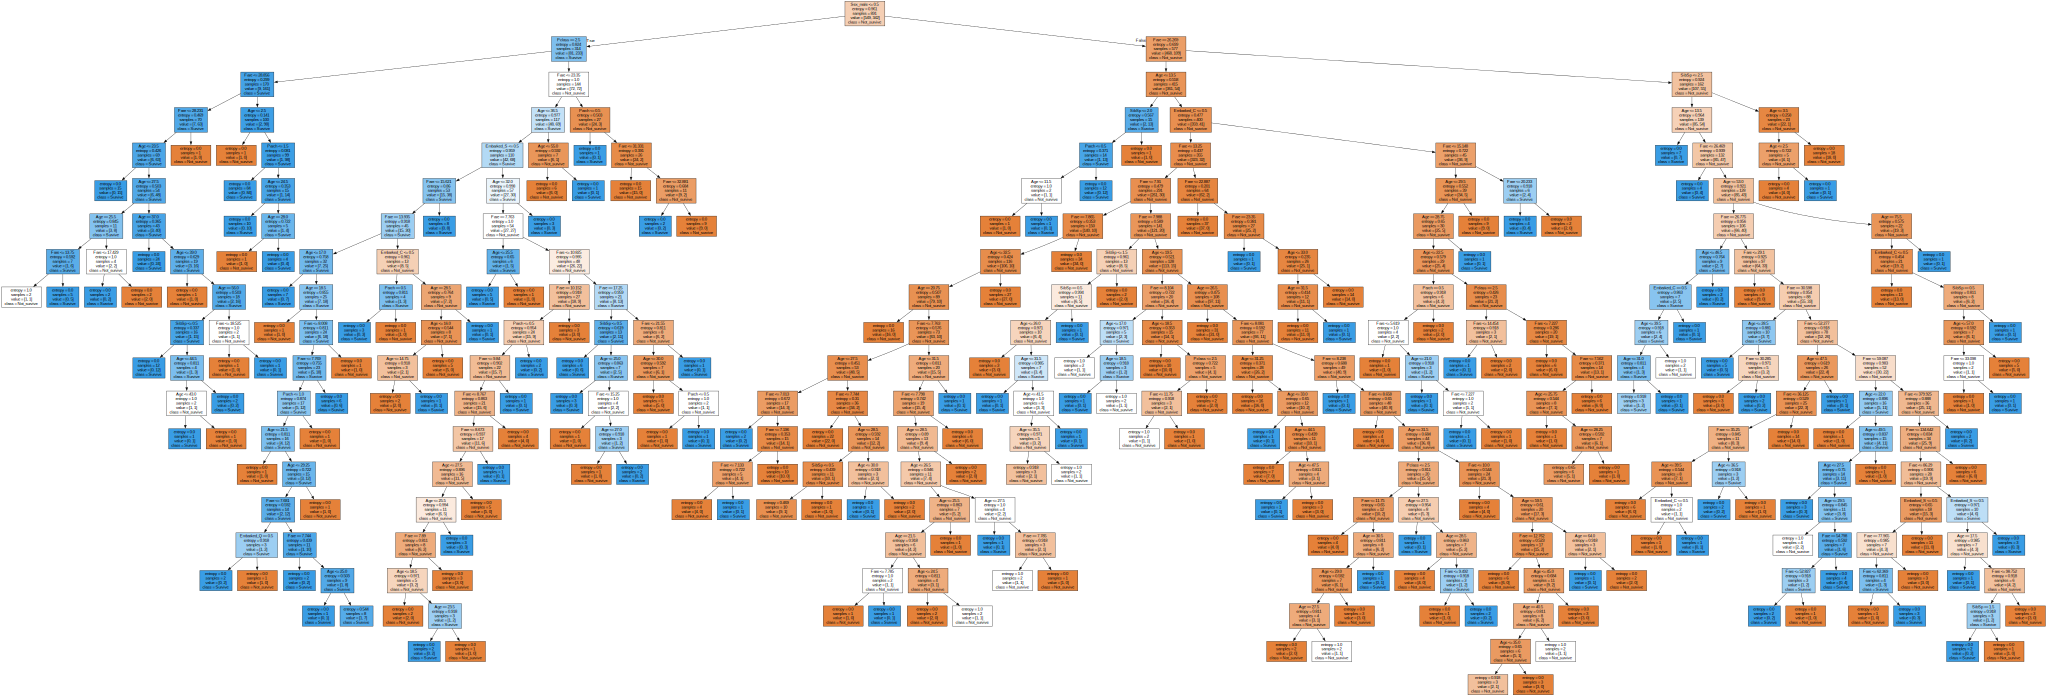

In [204]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Not_survive', 'Survive'],       # здесь добавили имена классам ([y=0, y=1])
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

получили ОГРОМНОЕ ДЕРЕВО, раз за разом уменьшая значение энтропии

Так что же именно пошло не так? Почему наше дерево решений так разрослось до огромных размеров?

И кажется, что те взаимосвязи которые оно выстроило - усложнены, и человек решил бы всё явно проще.

Что случилось?

Случилась интересная штука. Мы примерно разобрали как устроен математический аппарат дерева решений и какой алгоритм там используется. Дерево решений не ставит своей целью вычленить какой-то паттерн, какую-то общую закономерность, которую можно использовать как некоторое генерализированное правило.

Помните с самого начала курс мы говорили о том, что такое обучиться чему-то? Например, научить ребенка отличать кошек от собак. Мы показываем ему 15 кошек и 15 собак и задача ребенка не отличать конкретно этих 15 кошек и 15 собак, а вычислить закономерность из этих 30 примеров и затем отличать между собой любых кошек и собак.

А в дереве решений, которое мы описали, это никак не заложено. Всё что делает дерево решений это говорит - пока я могу ещё снизить энтропию я буду снижать энтропию и разделять кошек от собак, кошек от собак до тех пор, пока все кошки не будут классифицированы как кошки, а собака - как собаки. И это далеко не то же самое, что вычленить общую закономерность.

Подытожим всё вышесказанное. То что мы наблюдали называется переобучение или overfitting нашей модели.

Мы сказали нашей модели не вычлени закономерность в нашей модели, которая разделяет наших пассажиров на: выжил/не выжил, а мы сказали дереву вот тебе наш датафрейм, вот переменная y - сделай такое дерево решений, которое безошибочно классифицирует все наблюдения в нашем датафрейме.

Как только мы спускаемся всё ниже и ниже у нас возникают новые неопределённости.

То есть дерево решает задачу классификации конкретно этих данных, не вычленяя при этом какое-то правило

### Вывод: заниматься выискиванием стопроцентного описания каждой такой отдельной ситуации - неправильно

Почему наше дерево так сильно разрастается, мы разобрались. Потому что дерево "из коробки" не ставит задачу вычленить общую закономерность, правило, закон природы, которое мы дали ему в наших данных. Оно пытается безошибочно классифицировать каждое наблюдение.

1) что с этим делать?

Нам нужно проверить, что наша закономерность, проверенная на нашей выборке, хорошо работает и на новых данных.

То есть мы прогоняем дерево решений на новых данных и сравниваем предсказанные значения с их реальными значениями. Это позволит нам проверить правильно или нет работает наша модель.

2) как добиться того, чтобы дерево решений решало другую задачу? Именно **задачу вычленения общей закономерности**.

Здесь нам на помощь приходит **концепция подбора параметров**.

#### У нашего дерева решений есть параметр, который мы можем безболезненно варьировать - глубина дерева. То есть мы можем ограничить количество вопросов, которое дерево может задать нашим данным.

##### Что это означает на практике?

Мы говорим дереву: "Смотри у тебя есть Титаник. Ты умеешь правильно подбирать вопросы для снижения энтропии, но у тебя есть только 5 вопросов. Твоя задача задать всего 5, но самых главных вопросов, которые опишут почему одни люди на Титанике умирают, а другие нет".

Именно такой подход ограничения глубины роста дерева вниз отчасти решает нашу проблему переобучения. Потому что когда мы переформулировали задачу дереву: "У тебя есть некоторе ресурсы - воспользуйся ими максимально эффективно".


#### ИТОГ: 
1) Научиться ограничивать дерево в его стремлении расти как можно глубже
2) Нашему дереву показывать два набора данных:
- данные, на которых наше дерево обучится
- данные, на которых дерево протестируется 

In [205]:
# используем метод train_test_split - удобная функция, получающая на вход датафрейм X с фичами,
                                    # датафрейм y и разбивает их в заданной пропорции на тестовую и обучающую выборки

from sklearn.model_selection import train_test_split

Назначим дополнительный параметр для данного метода - test_size:
- он определит , сколько данных попадет в тестовую выборку, а сколько - в обучающую

In [206]:
# назначим этот параметр = 0.33 (33% уйдут в тестовую выборку)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42)

In [207]:
X_train         # 66% yfiих даннх для обучения

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
6,1,54.0,0,0,51.8625,0,1,0,0,1
718,3,28.0,0,0,15.5000,0,1,0,1,0
685,2,25.0,1,2,41.5792,0,1,1,0,0
73,3,26.0,1,0,14.4542,0,1,1,0,0
882,3,22.0,0,0,10.5167,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
106,3,21.0,0,0,7.6500,1,0,0,0,1
270,1,28.0,0,0,31.0000,0,1,0,0,1
860,3,41.0,2,0,14.1083,0,1,0,0,1
435,1,14.0,1,2,120.0000,1,0,0,0,1


In [208]:
X_test          # 33% наших данных, взятых для тестирования

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
709,3,28.0,1,1,15.2458,0,1,1,0,0
439,2,31.0,0,0,10.5000,0,1,0,0,1
840,3,20.0,0,0,7.9250,0,1,0,0,1
720,2,6.0,0,1,33.0000,1,0,0,0,1
39,3,14.0,1,0,11.2417,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
715,3,19.0,0,0,7.6500,0,1,0,0,1
525,3,40.5,0,0,7.7500,0,1,0,1,0
381,3,1.0,0,2,15.7417,1,0,1,0,0
140,3,28.0,0,2,15.2458,1,0,1,0,0


In [209]:
y_train             # 66% данных о живых/погибших пассажирах

6      0
718    0
685    0
73     0
882    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 596, dtype: int64

In [210]:
y_test      # 33% данных о живых/погибших пассажирах

709    1
439    0
840    0
720    1
39     1
      ..
715    0
525    0
381    1
140    0
173    0
Name: Survived, Length: 295, dtype: int64

тот факт, что наше дерево глубокое и большое вообще в каком-то смысле может и не сигнализировать о проблеме.

Может быть закономерность настолько сложная, что описать её деревом меньших масштабов никак не получится.

Проверить это можно сравнив насколько хорошо наше дерево предсказывает правильные ответы на обучающей выборке(train множестве) и насколько хорошо - на тестовой. Это очень упрощённая версия валидации модели.

Воспользуемся встроенным методом score, чтобы определить насколько модель классификатора хорошо описывает / предсказывает число правильных ответов

In [211]:
clf.score(X,y)

0.9797979797979798

это значит, что в 97% случаев мы правильно классифицировали все наши наблюдения на ВСЕЙ выборке

а теперь обучим модель-классификатор на обучающей выборке:

In [212]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [213]:
clf.score(X_train, y_train)

0.9798657718120806

точность примерно такая же, даже стала чуть выше

А теперь посмотрим на тестовой выборке, на тех данных, которые наш **КЛАССИФИКАТОР НЕ ВИДЕЛ**.

In [214]:
clf.score(X_test, y_test)

0.7762711864406779

Здесь нужно обратить внимание на большую разницу в полученных значениях на обучащей и тестовой выборках.

##### Большая разница в значениях говорит об overfitting (переобучении)

ограничим глубину дерева (параметр max_depth)

In [215]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)     # параметр взяли наугад 

обучим модель

In [216]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

посмотрим точность модели:
- для обучающих данных
- для тестовых данных

In [217]:
clf.score(X_train, y_train)

0.8238255033557047

In [218]:
clf.score(X_test, y_test)

0.8203389830508474

#### Ок, а теперь поиграем с заданием глубины дерева - сделаем это вручную!

In [219]:
max_depth_values = range(1, 100)        # зададим массив из 100 значений для глубины дерева
scores_data = pd.DataFrame()            # создадим пустой датасэт для результатов (будем хи последовательно записывать)
for max_depth in max_depth_values:      # пройдемся циклом по всем значениям глубины

    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)     # для каждой глубины будем создавать
    clf.fit(X_train, y_train)                                                       # ..и обучать классификатор

# полученные значения точности модели будем записывать в две переменные
    train_score = clf.score(X_train, y_train)                                       
    test_score = clf.score(X_test, y_test)

# эти переменные будем складывать во временный датасэт внутри цикла
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score]})

# полученный датасэт будем добавлять в наш пустой датасэт с данными 
    scores_data = pd.concat([scores_data, temp_score_data])

# посмотрим на итоговый датасэт:

scores_data

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780
...,...,...,...
0,95,0.979866,0.769492
0,96,0.979866,0.769492
0,97,0.979866,0.779661
0,98,0.979866,0.786441


Теперь можно посмотреть, например, значения глубины дерева, при которых разница между точностью предсказаний на обучающих данных и на тестовых данных будет не более 3%: 

In [220]:
scores_data.query(' abs(1- train_score / test_score) < .03')

# отфильтровали таблицу таким образом, что модуль значения разности меньше 0.03 (то есть 3%)

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,3,0.823826,0.820339
0,4,0.833893,0.823729


Можно сгруппировать полученный датасэт удобным для построения графиков виде:

(поможет метод melt())

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.melt.html

In [221]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                          var_name='set_type', value_name='score')

scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
193,95,test_score,0.769492
194,96,test_score,0.769492
195,97,test_score,0.779661
196,98,test_score,0.786441


на вход метол получит датасэт, а дополнительными параметрами выступят:
- в качестве основных данных выступят глубина дерева
- имена, которые нужно будет собрать в одну колонку, нужно указать в value_vars
- имя новой колонки
- колонка значений из двух собранных

По сути, метод перенесет содержимое двух колонок в одну, расположив одну под другой

А теперь нанесем распределение значений score для двух видов: 
- train
- test

для нанесения (нескольких) линий распределения на один график подходит lineplot из библиотеки seaborn

<AxesSubplot: xlabel='max_depth', ylabel='score'>

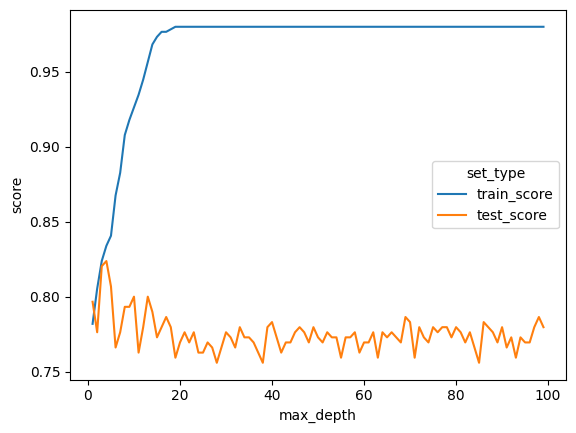

In [222]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

# данные - сам датасэт
# по оси Х - глубина
# по оси у - точность модели
# виды линий - взять из столбика вид (train or test)

#### анализ графика:
- с увеличеним глубины дерева растет точность классификации на тренировочной выборке
- но это не всегда ведет к нахождению общих закономерностей исследуемых данных
- test score изначально невелик(модель еще не доучилась), на промежутке 3-5 score максимален(оптимальное состояние: 
- закономерность с изученных данных переносится на новые), но в дальнейшем с увеличеним train score начинает падать test score(переход от недообученности к переобученности)

Построим дерево с параметром глубины = 3:

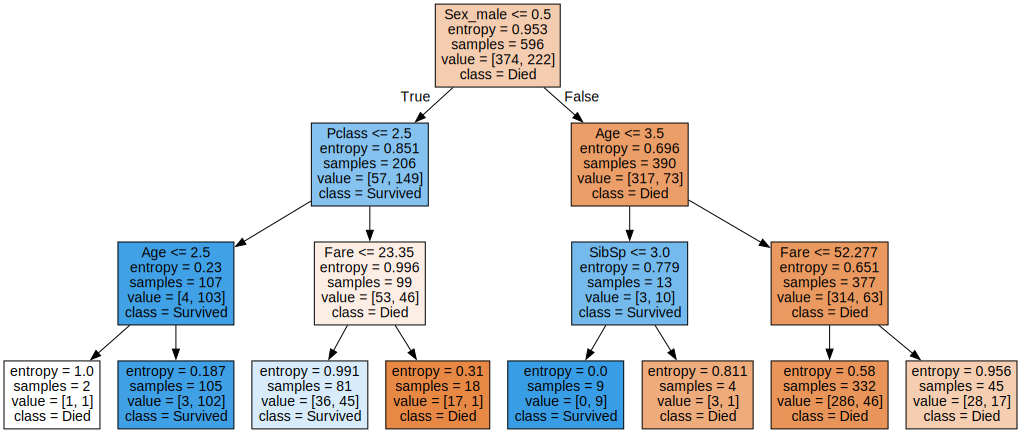

In [223]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)  

clf.fit(X_train, y_train)

graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X_train),
                                    class_names=['Died', 'Survived'],       # здесь добавили имена классам ([y=0, y=1])
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

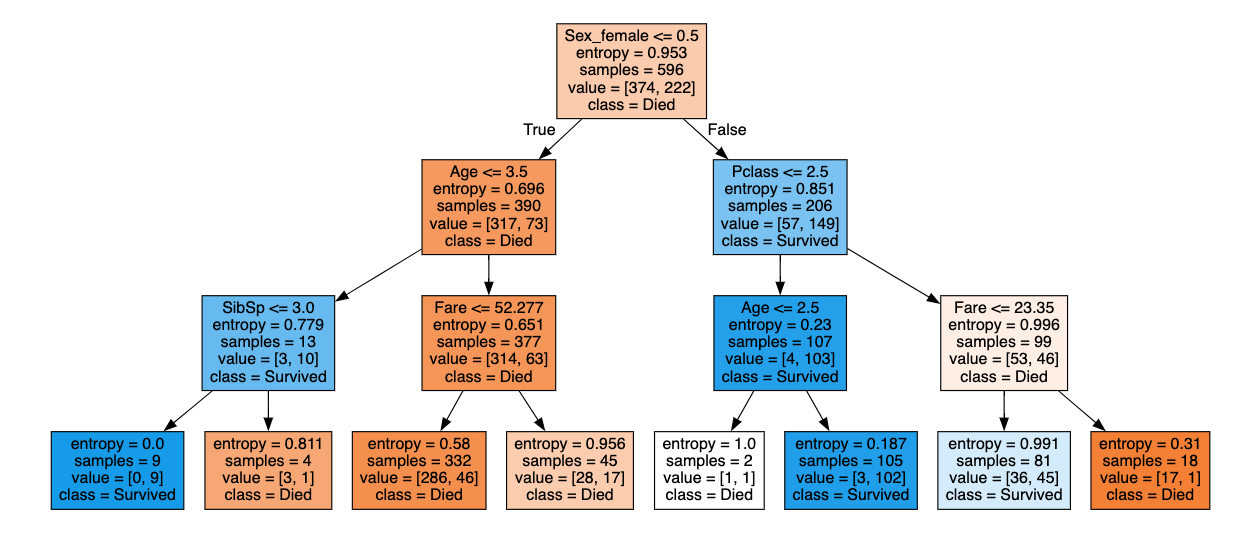

Что уже сейчас можно сказать?
1) при заданной глубине = 3 точность модели составляет 82%
2) модель может предсказывать переменную выживет/не выживет для любого нового пассажира, если она получит все вводные: пол, возраст, класс билета, число сопутствующих с ним пассажиров, стоимость билета

Например, на вход задаем нового пассажира: 
- женщина, 1 или второй класс, 2 или меньше лет:
- спускаясь вниз по дереву , учитывая каждый параметр, попадаем в прямоугольник ВЫЖИЛ (энтропия 0.187)
- число положительных исходов - 102, число отрицательных исходов - 3
- это значит, что вероятность выжить у этого пассажира составляет 102/(102+3) = 97%

#### НО
данное дерево все равно выглядит переобученным

например, есть разделение, которое приводит к тому, что под условие Age <= 2.5 проходит всего два наблюдения с разными классами, запомним эту проблему деревьев и вернемся к ней позже.

В чем проблема?

косяк в том, что вся наша работа для выбора наиболее подходящей глубины для КОНКРЕТНЫХ тестовых данных была сделана ВРУЧНУЮ:
- сначала обучили на одной глубине, посчитали точность модели для двух датасэтов (тренировочный и тестовый), сравнили - и поняли, что они заметно отличаются
- прогнали нашу модель через 99 разных значений глубины дерева, НАШЛИ оптимальную (путем сравнения точности модели на двух датасэтах)
- а теперь проблема: ЕСЛИ дать модели для проверки НОВЫЙ датасэт, то точность модели пострадает и будет отличной от изначальной при КАЖУЩЕЙСЯ нам оптимальной глубине дерева модели

#### как решать? используем кросс-валидацию
1) засплитим (разделим) данные на 5 частей (задается в кросс-валидаторе)
2) поочередно обучаем модель по такому принципу:
- 1 кусок после сплита уходит в тестовые данные, а 2,3,4,5 - в обучающие
- 2 кусок после сплита уходит в тестовые данные, а 1,3,4,5 - в обучающие
- 3 кусок после сплита уходит в тестовые данные, а 1,2,4,5 - в обучающие
- 4 кусок после сплита уходит в тестовые данные, а 1,2,3,5 - в обучающие
- 5 кусок после сплита уходит в тестовые данные, а 1,2,3,4 - в обучающие

то есть получается 5 моделей, которые мы поочередно тестим на данных, которые разорвали на 5 кусков, выясняя таким образом какая модель является наиболее валидно

In [224]:
from sklearn.model_selection import cross_val_score
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
cross_val_score(clf, X_train, y_train , cv=5)                           # здесь наполняем наш кросс-валидатор: модель, тренировочные данные, число сплитов

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

3) усредняем значение полученных точностей пяти разных моделей для выбора оптимальной

In [225]:
cross_val_score(clf, X_train, y_train , cv=5).mean()

0.7886274509803922

4) **СНОВА** заполним таблицу точности моделей, используя дополнительный параметр - среднюю величину кросс-валидации:

In [226]:
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train , cv=5).mean()         # добавили новый параметр - набор средних значений кросс-валидации модели 
                                                                                        #для каждой глубины дерева (от 1 до 99)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = pd.concat([scores_data, temp_score_data])

scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.795350
...,...,...,...,...
0,95,0.979866,0.776271,0.761779
0,96,0.979866,0.769492,0.768501
0,97,0.979866,0.762712,0.773557
0,98,0.979866,0.769492,0.760112


5) отберем строку с максимальным значением кросс-валидации модели (иными словами, с максимальной точностью модели)

In [227]:
max(scores_data.cross_val_score)

0.8037535014005602

In [228]:
scores_data.query('cross_val_score == 0.8054341736694678')

,max_depth,train_score,test_score,cross_val_score


ну или так:

In [229]:
scores_data.loc[scores_data.cross_val_score == max(scores_data.cross_val_score)]        # почему-то это мне проще воспринимать (синтаксис)

,max_depth,train_score,test_score,cross_val_score
0,6,0.86745,0.769492,0.803754


In [246]:
scores_data.loc[scores_data.cross_val_score == max(scores_data.cross_val_score)].loc[0]['max_depth']

6.0

6) переформатируем таблицу для удобного построения графика для обучающих и тестовых данных: 

In [231]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')
scores_data_long.head() 

# таблица теперь содержит три типа значений: train, test and cross_val scores

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<AxesSubplot: xlabel='max_depth', ylabel='score'>

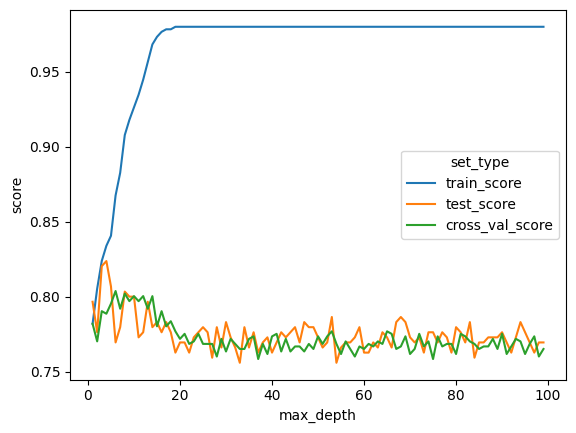

In [232]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

здесь видим, что наибольшая точность модели (в соотв с критерием кросс-валидации) достигается все-таки при БОЛЬШЕЙ глубине дерева:
- ранее от 3 до 5 мы видели
- теперь это значение = 6 (см чуть выше расчет максимального значения кросс-валидации)

7) создадим на основе этих данных некий НАИЛУЧШИЙ классификатор и посчитаем значение точности модели для ТЕСТОВЫХ данных, которых модель еще не видела

In [233]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)
cross_val_score(best_clf, X_test, y_test , cv=5).mean()

0.8169491525423729

А теперь снова построим дерево:

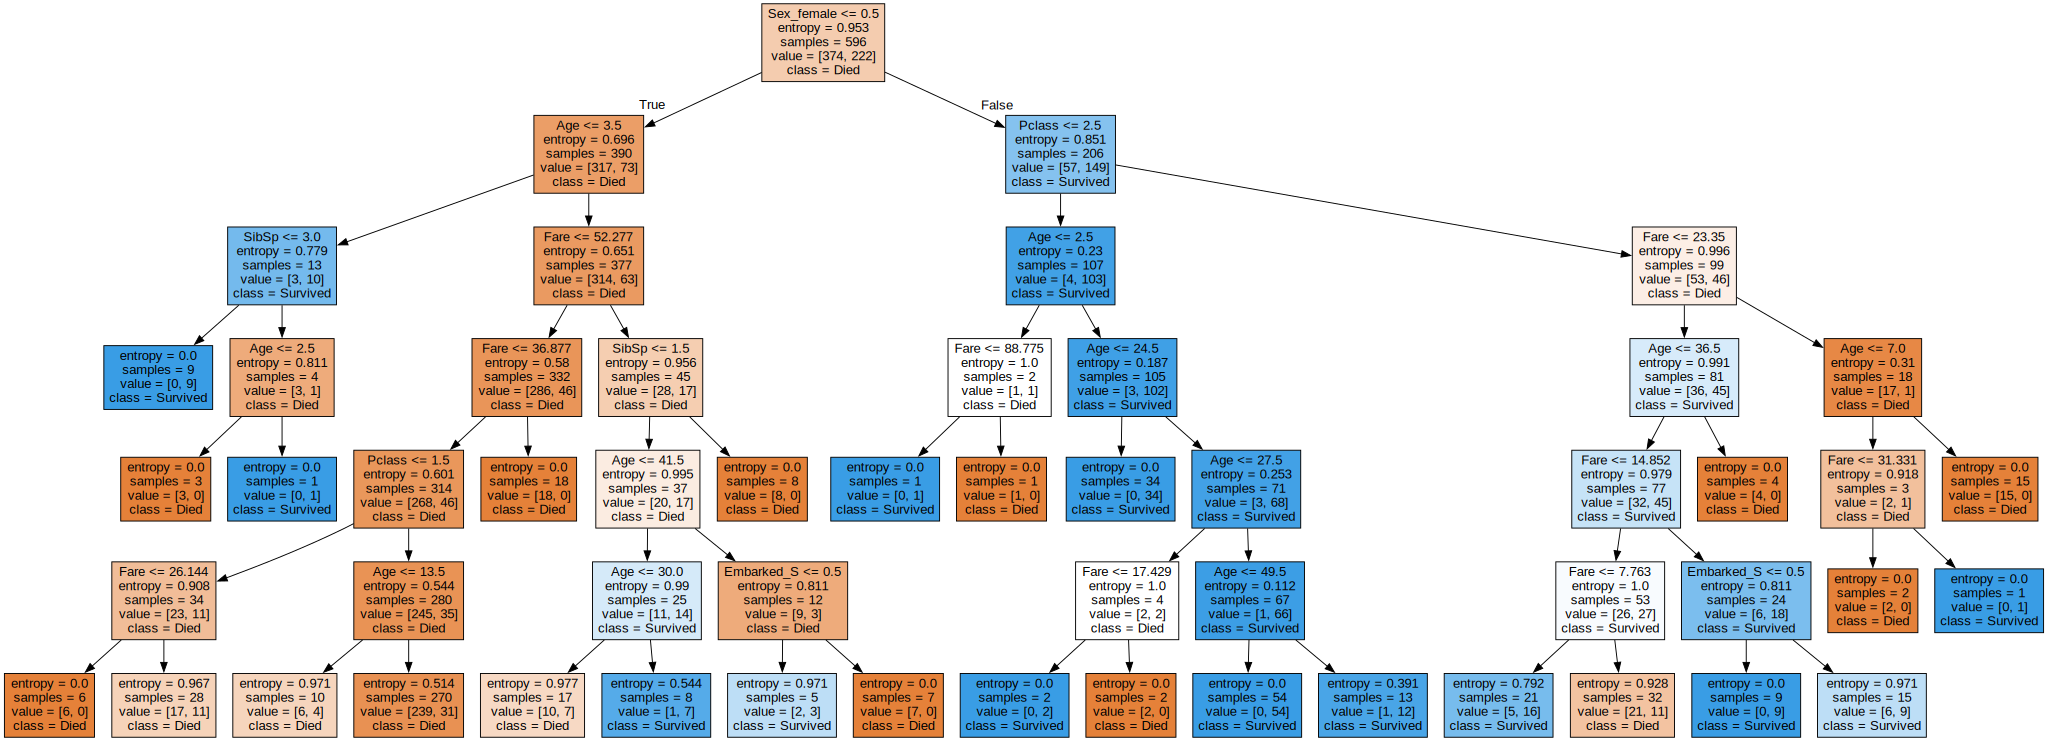

In [234]:
best_clf.fit(X_train, y_train)
graph = Source(tree.export_graphviz(best_clf, out_file=None,
                                    feature_names=list(X_train),
                                    class_names=['Died', 'Survived'],       # здесь добавили имена классам ([y=0, y=1])
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

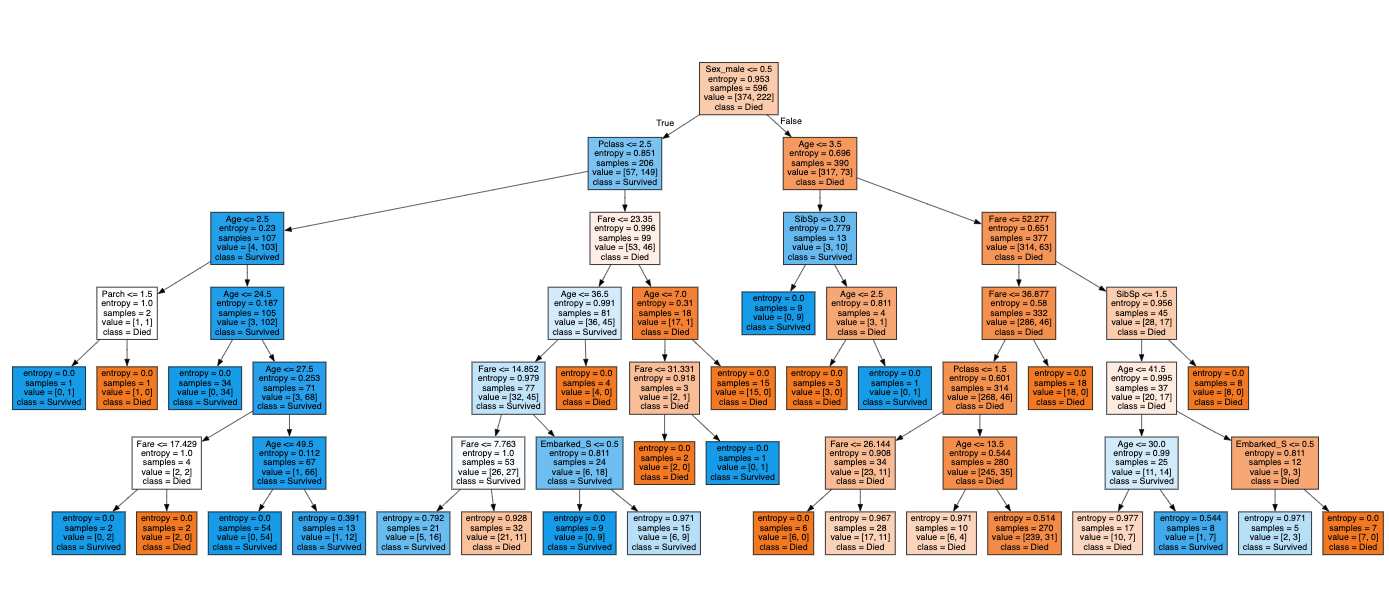

### ТЕСТОВАЯ задача - работа с длиной лепестков ирисов

In [235]:
iris_data_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv')

iris_data_train.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [236]:
iris_data_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv')

iris_data_test.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,114,5.8,2.8,5.1,2.4,2
1,70,5.9,3.2,4.8,1.8,1
2,138,6.0,3.0,4.8,1.8,2
3,59,5.2,2.7,3.9,1.4,1
4,44,5.1,3.8,1.9,0.4,0


смотрим какие уникальные значения есть у переменной , которую хотим предсказывать

In [237]:
iris_data_train.species.unique()

array([2, 0, 1])

In [238]:
iris_data_test.species.unique()

array([2, 1, 0])

смотрим какого типа данные содержатся в таблице - чтобы если что предобработать датасэт

In [239]:
iris_data_train.isnull().sum()

Unnamed: 0      0
sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [240]:
iris_data_train.dtypes

Unnamed: 0        int64
sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
species           int64
dtype: object

обозначим зависимую переменную и независимые переменные

для обучения возьмем тренировочный датасэт

In [241]:
X_train = iris_data_train.drop(['Unnamed: 0', 'species'], axis=1 )
y_train = iris_data_train.species




для проверки данных возьмем тестовый датасэт

In [242]:
X_test = iris_data_test.drop(['Unnamed: 0', 'species'], axis=1 )
y_test = iris_data_test.species

прогоним модель классификатора по 99 разным глубинам:

In [243]:
scores_iris_data = pd.DataFrame()

max_depth_values = range(1, 100) 
rs = np.random.seed(0)

for max_depth in max_depth_values:

    clf_iris = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf_iris.fit(X_train, y_train)
    train_score = clf_iris.score(X_train, y_train)

    accuracy_score= clf_iris.score(X_test, y_test)
    
    
    #accuracy_score = cross_val_score(clf_iris, X_test, y_test , cv=5).mean()        
                                                                                        
    
    temp_score_iris_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'accuracy_score': [accuracy_score]})
    scores_iris_data = pd.concat([scores_iris_data, temp_score_iris_data])

scores_iris_data

,max_depth,train_score,accuracy_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92
...,...,...,...
0,95,1.00,0.92
0,96,1.00,0.92
0,97,1.00,0.92
0,98,1.00,0.94


переформатируем датасэт для удобства построения графика:

In [244]:
scores_iris_data_long = pd.melt(scores_iris_data, id_vars=['max_depth'], value_vars=['train_score', 'accuracy_score'],
                          var_name='set_type', value_name='score')
scores_iris_data_long



,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00
...,...,...,...
193,95,accuracy_score,0.92
194,96,accuracy_score,0.92
195,97,accuracy_score,0.92
196,98,accuracy_score,0.94


строим график

<AxesSubplot: xlabel='max_depth', ylabel='score'>

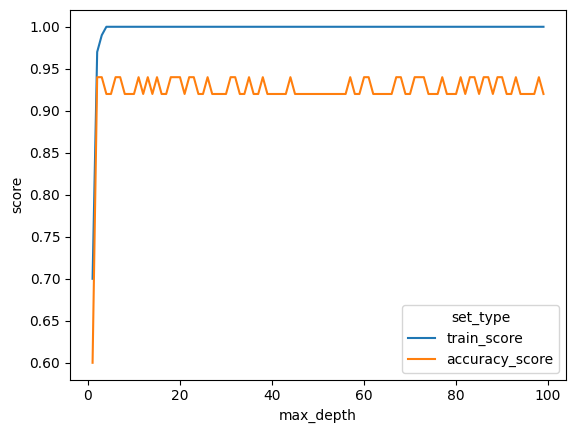

In [245]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_iris_data_long)